In [23]:
from pandas import read_csv

df = read_csv("steam_games_data_cleaned.csv")
df

,name,steam_appid,short_description,detailed_description,recommendations,genres
0,Counter-Strike,10,Play the world's number 1 online game. Engage ...,Play the world's number 1 online game. Engage ...,162799,['Action']
1,Team Fortress Classic,20,One of the most popular online games of all ti...,One of the most popular online games of all ti...,6688,['Action']
2,Day of Defeat,30,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,4326,['Action']
3,Deathmatch Classic,40,Enjoy fast-paced multiplayer gaming with Death...,Enjoy fast-paced multiplayer gaming with Death...,2349,['Action']
4,Half-Life: Opposing Force,50,Return to the Black Mesa Research Facility as ...,Return to the Black Mesa Research Facility as ...,23052,['Action']
...,...,...,...,...,...,...
10408,Summer Crush,2163060,Summer Crush is a visual novel for adults wher...,Summer Crush is a visual novel for adults wher...,383,['Indie']
10409,Yet Another Zombie Survivors,2163330,The Horde is coming but you're ready to fight ...,You've had enough of hiding behind the barrica...,10989,"['Action', 'Casual', 'Indie', 'RPG']"
10410,Tales of Spark,2165390,Tales of Spark is a Hack Slash with an Eastern...,Development PlanFollow and join usFor inquirie...,554,"['Action', 'Adventure', 'Indie', 'RPG']"
10411,Taora : Survival,2165470,Taora is an open world survival game with uniq...,Taora is an island that is infested with zombi...,305,"['Action', 'Adventure', 'RPG', 'Simulation']"


In [24]:
from sentence_transformers import SentenceTransformer

model_name = "all-MiniLM-L6-v2"
model = SentenceTransformer(model_name)
print(f"Loaded model: {model_name} (Vector dimension: {model.get_sentence_embedding_dimension()})")

Loaded model: all-MiniLM-L6-v2 (Vector dimension: 384)


In [25]:
genre_names = {"Indie", "Action", "Adventure", "Simulation", "RPG", "Strategy", "Casual"}

In [26]:
def construct_typical_genre_paragraph(genre_name: str) -> str:
	return f"This is a game of type '{genre_name.lower()}'."

In [27]:
genre_embeddings = {
	genre_name: model.encode(construct_typical_genre_paragraph(genre_name=genre_name), convert_to_numpy=True)
	for genre_name in genre_names
}

In [28]:
import numpy as np
from scipy.spatial.distance import cosine


def calculate_genre_cosine_distance(text: str, genre_embedding: np.ndarray) -> float:
	text_embedding = model.encode(text, convert_to_numpy=True)
	distance = cosine(text_embedding, genre_embedding)
	return distance

In [29]:
def extract_genre_features(game_row: dict, desc_column: str = "short_description") -> dict:
	features = {}
	description = game_row[desc_column]

	for genre_name, genre_embedding in genre_embeddings.items():
		desc_distance = calculate_genre_cosine_distance(description, genre_embedding)
		features[f"{genre_name.lower()}_cosine_distance"] = desc_distance

	return features

In [30]:
import matplotlib.pyplot as plt

def visualize_genre_features(short_desc_game_features: dict, detailed_desc_game_features: dict):
	short_desc_values = [short_desc_game_features[f"{genre_name.lower()}_cosine_distance"] for genre_name in genre_names]
	detailed_desc_values = [detailed_desc_game_features[f"{genre_name.lower()}_cosine_distance"] for genre_name in genre_names]
	data = [short_desc_values, detailed_desc_values]
	fig, ax = plt.subplots()
	cax = ax.matshow(data, cmap="Greys", vmin=0.5, vmax=0.95)

	ax.set_xticks(range(len(genre_names)))
	ax.set_xticklabels(list(genre_names))
	ax.set_yticks([0, 1])
	ax.set_yticklabels(["Short Description", "Detailed Description"])

	for (i, j), val in np.ndenumerate(data):
		ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='black' if val < 0.6 else 'white')

	plt.colorbar(cax)
	plt.show()

In [31]:
def plot_for_game(game_idx: int) -> dict:
	game = df.iloc[game_idx]
	game_features = extract_genre_features(game_row=game)
	detailed_desc_game_features = extract_genre_features(game_row=game, desc_column="detailed_description")
	visualize_genre_features(short_desc_game_features=game_features, detailed_desc_game_features=detailed_desc_game_features)
	return game

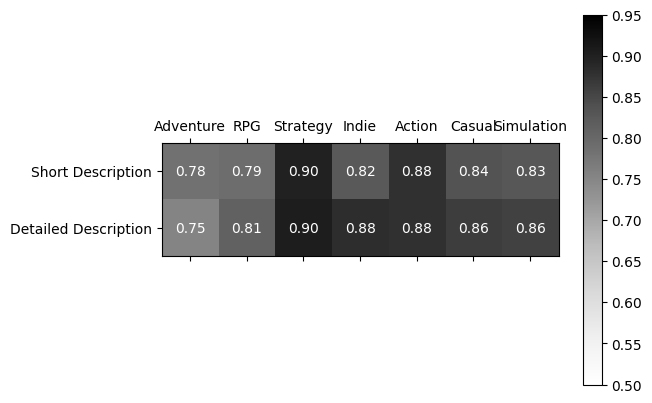

name                                                          Xanadu Next
steam_appid                                                        312560
short_description       Whenever mist hangs over Lake Orwell, sailors ...
detailed_description    Whenever mist hangs over the waters of Lake Or...
recommendations                                                       708
genres                                                  ['Action', 'RPG']
Name: 1535, dtype: object

In [32]:
plot_for_game(1535)

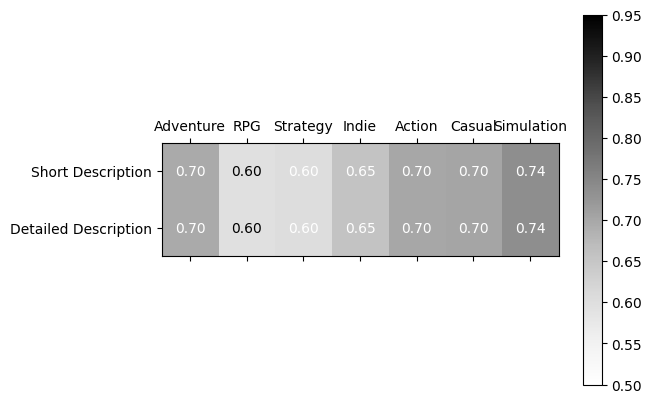

name                                                       Counter-Strike
steam_appid                                                            10
short_description       Play the world's number 1 online game. Engage ...
detailed_description    Play the world's number 1 online game. Engage ...
recommendations                                                    162799
genres                                                         ['Action']
Name: 0, dtype: object

In [33]:
plot_for_game(0)

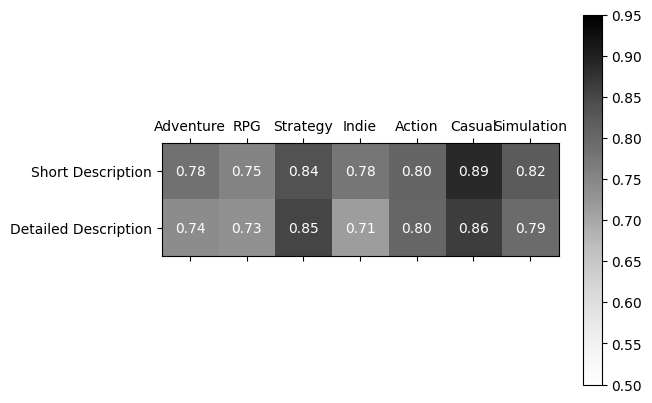

name                      Dysfunctional Systems: Learning to Manage Chaos
steam_appid                                                        248800
short_description       From Dischan Media, creators of the highly acc...
detailed_description    From Dischan Media, creators of the highly acc...
recommendations                                                       627
genres                            ['Adventure', 'Casual', 'Indie', 'RPG']
Name: 1000, dtype: object

In [34]:
plot_for_game(1000)

In [35]:
import pandas as pd

df = pd.read_csv("steam_games_data_deep_cleaned.csv")
df.head()

,name,steam_appid,short_description,detailed_description,recommendations,genres
0,Counter-Strike,10,play world number 1 online game engage incredi...,play world number 1 online game engage incredi...,162799,['Action']
1,Team Fortress Classic,20,one popular online game time team fortress cla...,one popular online game time team fortress cla...,6688,['Action']
2,Day of Defeat,30,enlist intense brand axis v allied teamplay se...,enlist intense brand axis v allied teamplay se...,4326,['Action']
3,Deathmatch Classic,40,enjoy fastpaced multiplayer gaming deathmatch ...,enjoy fastpaced multiplayer gaming deathmatch ...,2349,['Action']
4,Half-Life: Opposing Force,50,return black mesa research facility one milita...,return black mesa research facility one milita...,23052,['Action']


In [36]:
import nltk
from collections import Counter

corpus = df["detailed_description"]

def build_histogram(corpus):
    histogram = Counter()
    for desc in corpus:
        tokens = nltk.word_tokenize(desc.lower())
        for token in tokens:
            if token.isalpha():
                histogram[token] += 1

    return histogram

histogram = build_histogram(corpus)
len(histogram)

130769

In [37]:
MAX_VOCAB_SIZE = 20000

most_common_words = histogram.most_common(MAX_VOCAB_SIZE)
lexicon = {word: idx for idx, (word, _) in enumerate(most_common_words)}
lexicon

{'game': 0,
 'new': 1,
 'world': 2,
 'player': 3,
 'unique': 4,
 'character': 5,
 'play': 6,
 'one': 7,
 'time': 8,
 'mode': 9,
 'take': 10,
 'story': 11,
 'enemy': 12,
 'experience': 13,
 'make': 14,
 'different': 15,
 'battle': 16,
 'way': 17,
 'weapon': 18,
 'level': 19,
 'get': 20,
 'find': 21,
 'every': 22,
 'system': 23,
 'use': 24,
 'skill': 25,
 'like': 26,
 'even': 27,
 'life': 28,
 'friend': 29,
 'feature': 30,
 'also': 31,
 'build': 32,
 'explore': 33,
 'combat': 34,
 'set': 35,
 'challenge': 36,
 'gameplay': 37,
 'power': 38,
 'fight': 39,
 'item': 40,
 'city': 41,
 'create': 42,
 'need': 43,
 'control': 44,
 'ability': 45,
 'many': 46,
 'full': 47,
 'help': 48,
 'team': 49,
 'mission': 50,
 'puzzle': 51,
 'choose': 52,
 'including': 53,
 'map': 54,
 'first': 55,
 'war': 56,
 'powerful': 57,
 'secret': 58,
 'hero': 59,
 'back': 60,
 'around': 61,
 'original': 62,
 'multiplayer': 63,
 'discover': 64,
 'across': 65,
 'become': 66,
 'online': 67,
 'upgrade': 68,
 'unlock': 69,

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

bow_embeddings = CountVectorizer(vocabulary=lexicon, binary=True).fit_transform(corpus)
bow_embeddings.shape

(10413, 20000)

In [40]:
import pickle
import os

if os.path.exists("embeddings") is False:
    os.makedirs("embeddings")

with open("embeddings/bow_embeddings.pkl", "wb") as f:
    pickle.dump(bow_embeddings, f)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=MAX_VOCAB_SIZE, vocabulary=lexicon)
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1201389 stored elements and shape (10413, 20000)>

In [42]:
with open("embeddings/tfidf_embeddings.pkl", "wb") as f:
    pickle.dump(tfidf_matrix, f)

In [43]:
bert_embeddings = np.vstack([model.encode(doc, convert_to_numpy=True) for doc in corpus])
bert_embeddings.shape

(10413, 384)

In [45]:
with open("embeddings/bert_embeddings.pkl", "wb") as f:
    pickle.dump(bert_embeddings, f)